# Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

In [69]:
%matplotlib inline
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# генерация выборки объема 1000 из распределения
expon_rv = stats.expon()
sample = expon_rv.rvs(1000)

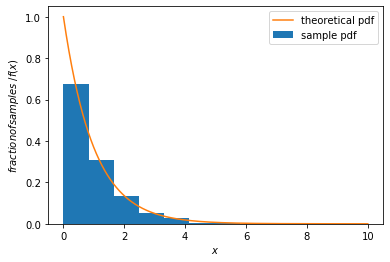

In [79]:
# гистограмма выборки:
plt.hist(sample, density = True, label='sample pdf') # Построение графика

# график теоретической плотности распределения:
x = np.linspace(0, 10, 1000) # массив значений аргумента
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf') # pdf - probability density function
plt.legend()
plt.ylabel('$fraction of samples\ /f(x)$')
plt.xlabel('$x$')
plt.show()

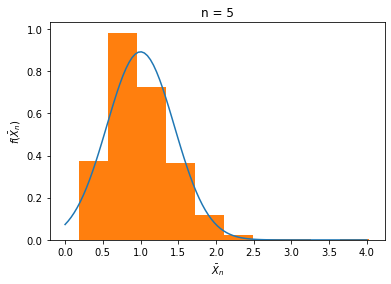

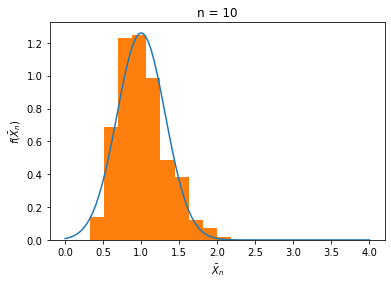

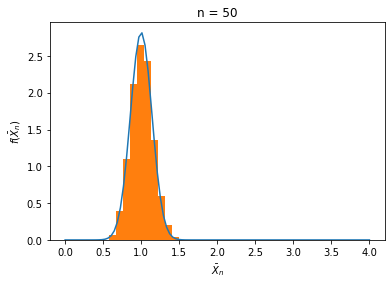

In [90]:
for n in [5, 10, 50]:
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for i in range(1000):
        sample = expon_rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    # теоритеческая плотность вероятности для нормального распределения
    mu = 1 # теоретическое математическое ожидание
    variance = (1./n) # теоретическая дисперсия
    sigma = np.sqrt(variance) # теоретическая сигма
    norm_rv = stats.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf)
    plt.hist(means, density = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()